<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/LLM_Destekli_Teknisyen_Asistan%C4%B1_(Colab_Uyumlu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Görsel başarıyla yüklendi: photo-1620712943543-bcc4688e7485


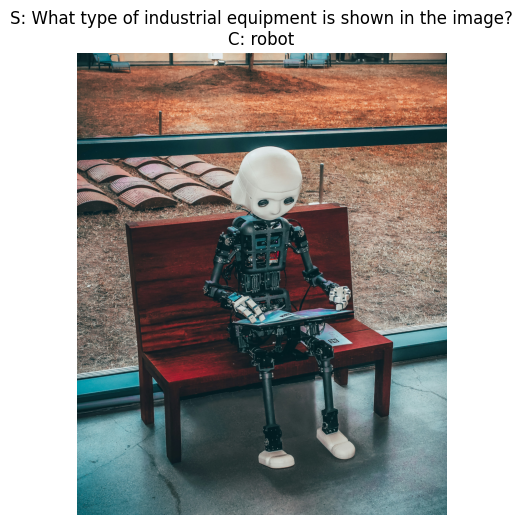


🔍 ANALİZ SONUCU:
Soru: What type of industrial equipment is shown in the image?
Cevap: robot


In [5]:
# 1. GEREKLİ KURULUMLAR
!pip install -q transformers torch pillow requests

# 2. KÜTÜPHANELER
from PIL import Image
import requests
from io import BytesIO
from transformers import BlipProcessor, BlipForQuestionAnswering
import matplotlib.pyplot as plt

# 3. MODEL YÜKLEME
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

# 4. GÜVENLİ GÖRSEL YÜKLEME FONKSİYONU
def load_image():
    # Çalışan ücretsiz endüstriyel görseller
    image_urls = [
        "https://images.unsplash.com/photo-1620712943543-bcc4688e7485",  # Endüstriyel robot
        "https://m.media-amazon.com/images/I/71CjYKqLTGL.jpg",          # Fabrika robotu
        "https://www.robots.com/images/rv-f-series.jpg"                # Robot görseli
    ]

    for url in image_urls:
        try:
            response = requests.get(url, timeout=10)
            img = Image.open(BytesIO(response.content)).convert("RGB")
            print(f"✅ Görsel başarıyla yüklendi: {url.split('/')[-1]}")
            return img
        except Exception as e:
            print(f"⚠️ Hata ({url.split('/')[-1]}): {str(e)}")
            continue

    # Yedek olarak basit bir görsel oluştur
    print("🔴 Yerel görsel kullanılıyor")
    return Image.new('RGB', (400, 300), color='gray')

# 5. GÖRSEL VE SORU
image = load_image()
question = "What type of industrial equipment is shown in the image?"

# 6. ANALİZ
try:
    inputs = processor(image, question, return_tensors="pt")
    out = model.generate(**inputs)
    answer = processor.decode(out[0], skip_special_tokens=True)

    # SONUÇLARI GÖSTER
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f"S: {question}\nC: {answer}", fontsize=12)
    plt.axis('off')
    plt.show()

    print("\n🔍 ANALİZ SONUCU:")
    print(f"Soru: {question}")
    print(f"Cevap: {answer}")

except Exception as e:
    print(f"⛔ ANALİZ HATASI: {str(e)}")
    print("ℹ️ Çözüm için:")
    print("1. İnternet bağlantınızı kontrol edin")
    print("2. !pip install --upgrade transformers")
    print("3. Daha basit bir soru deneyin")